# **Hometask 3**

1.Clear the dataset obtained in the previous stages in accordance with the steps from the lecture

2.Perform data analysis (optional)

3.Choose a method and perform normalization

In [121]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
df = pd.read_csv('/content/data_filt_all.csv')

In [124]:
df

,Unnamed: 0,smiles,A,B,mu,alpha,gap,r2,u0,lipinskiHBA,...,n7aRing,n9aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,TopoShapeIndex
0,0,O=CC1CCC2OC2C1,3.61423,1.09149,2.0905,75.54,0.2258,1253.8737,-423.035656,2.0,...,0,0,0,0,1,0,0,0.276111,0.142500,0.666667
1,1,COC12CC=C3CC1C23,3.33497,1.50547,1.5224,82.20,0.1826,1047.6956,-385.774234,1.0,...,0,0,0,0,1,0,0,0.250000,0.000000,1.000000
2,2,OC1CCC(=O)C1,5.59112,1.96604,2.2377,56.85,0.2209,771.3820,-345.686487,2.0,...,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
3,3,N#CC12NC3CNC1C23,4.19762,1.34307,5.2940,74.13,0.2368,1017.8124,-396.880645,3.0,...,0,0,0,0,1,0,0,0.262222,0.062500,0.666667
4,4,CC(=NO)CC(C)(C)C,2.79330,0.93080,0.5406,88.74,0.2507,1518.5343,-405.527293,2.0,...,0,0,0,0,0,0,0,0.240000,0.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,C1OC23CCN=C2NC13,3.34284,1.73396,3.1256,73.93,0.2382,958.9895,-417.956479,3.0,...,0,0,0,0,0,0,0,0.097222,0.000000,1.000000
19996,19996,CC(C#C)C1=CON=C1,3.29901,1.16566,2.9980,75.07,0.2459,1236.5085,-400.708122,2.0,...,0,0,0,0,0,0,0,0.250000,0.080000,0.666667
19997,19997,CC(C)(C)C(C#N)C#N,1.79871,1.63214,4.5091,79.46,0.3225,1197.0545,-382.105873,2.0,...,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
19998,19998,COC(=O)C1CC(=O)N1,4.65384,0.89755,4.4515,66.65,0.2512,1364.6319,-475.072597,4.0,...,0,0,0,0,0,0,0,0.422222,0.118056,1.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 145 entries, Unnamed: 0 to TopoShapeIndex
dtypes: float64(98), int64(46), object(1)
memory usage: 22.1+ MB


1. Очистка данных

In [126]:
df.isna().sum()

Unnamed: 0        0
smiles            0
A                 0
B                 0
mu                0
                 ..
n8FRing           0
n9FaRing          0
GGI4              0
GGI5              0
TopoShapeIndex    0
Length: 145, dtype: int64

In [127]:
# Проверка на пропуски и NaN значения в колонке "smiles"
smiles_missing_values = df['smiles'].isnull().sum()
# Проверка на полные дубликаты по колонке "smiles"
smiles_duplicates = df[df.duplicated(subset=['smiles'], keep=False)]
# Проверка на пропуски (NaN) во всех строках датасета
nan_rows = df[df.isnull().any(axis=1)]

print("Пропуски и NaN значения в колонке 'smiles':", smiles_missing_values)
print("Полные дубликаты по колонке 'smiles':")
print(smiles_duplicates)
# Вывод информации о строках с пропусками
print("Строки с пропусками (NaN):")
print(nan_rows)

Пропуски и NaN значения в колонке 'smiles': 0
Полные дубликаты по колонке 'smiles':
       Unnamed: 0             smiles        A        B      mu  alpha     gap  \
488           488  c1c(c(c(nn1)F)N)O  2.41441  1.84997  5.4218  64.69  0.2041   
15928       15928  c1c(c(c(nn1)F)N)O  2.41441  1.84997  5.4218  64.69  0.2041   

              r2          u0  lipinskiHBA  ...  n7aRing  n9aRing  n5FRing  \
488    1016.9503 -494.051268          4.0  ...        0        0        0   
15928  1016.9506 -494.051268          4.0  ...        0        0        0   

       n6FRing  n7FRing  n8FRing  n9FaRing      GGI4  GGI5  TopoShapeIndex  
488          0        0        0         0  0.333333   0.0        0.333333  
15928        0        0        0         0  0.333333   0.0        0.333333  

[2 rows x 145 columns]
Строки с пропусками (NaN):
Empty DataFrame
Columns: [Unnamed: 0, smiles, A, B, mu, alpha, gap, r2, u0, lipinskiHBA, lipinskiHBD, NumRotatableBonds, NumAmideBonds, NumRings, NumHeterocyc

In [128]:
# Удаление полных дубликатов строк из DataFrame
df.drop_duplicates(subset=['smiles'], keep=False, inplace=True)

# Проверка наличия дубликатов после удаления
duplicates_after_removal = df[df.duplicated(subset=['smiles'], keep=False)]

print("Полные дубликаты после удаления:")
print(duplicates_after_removal)

Полные дубликаты после удаления:
Empty DataFrame
Columns: [Unnamed: 0, smiles, A, B, mu, alpha, gap, r2, u0, lipinskiHBA, lipinskiHBD, NumRotatableBonds, NumAmideBonds, NumRings, NumHeterocycles, NumSpiroAtoms, NumBridgeheadAtoms, nAcid, nBase, VE1_A, VR1_A, nN, nO, nF, ATS4dv, ATS5dv, ATS6dv, ATS7dv, ATS8dv, ATS8d, ATS0s, ATS3s, ATS4s, ATS3Z, ATSC2c, ATSC3c, ATSC5c, ATSC6c, ATSC7c, ATSC8c, ATSC1dv, ATSC2dv, ATSC3dv, ATSC4dv, ATSC5dv, ATSC6dv, ATSC7dv, ATSC8dv, ATSC4d, ATSC6d, ATSC2s, ATSC3s, ATSC4s, ATSC5s, GATS2c, GATS1dv, GATS2s, BCUTc-1l, BCUTdv-1h, BCUTdv-1l, BCUTd-1l, BCUTZ-1l, BCUTi-1h, nBondsD, nBondsT, RNCG, RPCG, C2SP2, C3SP2, C1SP3, C2SP3, C4SP3, Xch-3d, NssCH2, NtCH, NdsCH, NdssC, NaaaC, NsNH3, NsNH2, NssNH2, NdNH, NssNH, NaaNH, NsssNH, NdsN, NsssN, NddsN, NaasN, NsOH, NssO, NaaO, SdssC, SaasC, SssssC, IC2, TIC1, ZMIC1, FilterItLogS, PEOE_VSA2, ...]
Index: []

[0 rows x 145 columns]


То есть у меня 1 полный дубликат и нет NAN значений во всём датасете

In [129]:
# Удаление полных дубликатов строк из DataFrame
df.drop_duplicates(inplace=True)

# Проверка наличия дубликатов после удаления
duplicates_after_removal = df[df.duplicated(subset=['smiles'], keep=False)]

print("Полные дубликаты после удаления:")
print(duplicates_after_removal)
df

Полные дубликаты после удаления:
Empty DataFrame
Columns: [Unnamed: 0, smiles, A, B, mu, alpha, gap, r2, u0, lipinskiHBA, lipinskiHBD, NumRotatableBonds, NumAmideBonds, NumRings, NumHeterocycles, NumSpiroAtoms, NumBridgeheadAtoms, nAcid, nBase, VE1_A, VR1_A, nN, nO, nF, ATS4dv, ATS5dv, ATS6dv, ATS7dv, ATS8dv, ATS8d, ATS0s, ATS3s, ATS4s, ATS3Z, ATSC2c, ATSC3c, ATSC5c, ATSC6c, ATSC7c, ATSC8c, ATSC1dv, ATSC2dv, ATSC3dv, ATSC4dv, ATSC5dv, ATSC6dv, ATSC7dv, ATSC8dv, ATSC4d, ATSC6d, ATSC2s, ATSC3s, ATSC4s, ATSC5s, GATS2c, GATS1dv, GATS2s, BCUTc-1l, BCUTdv-1h, BCUTdv-1l, BCUTd-1l, BCUTZ-1l, BCUTi-1h, nBondsD, nBondsT, RNCG, RPCG, C2SP2, C3SP2, C1SP3, C2SP3, C4SP3, Xch-3d, NssCH2, NtCH, NdsCH, NdssC, NaaaC, NsNH3, NsNH2, NssNH2, NdNH, NssNH, NaaNH, NsssNH, NdsN, NsssN, NddsN, NaasN, NsOH, NssO, NaaO, SdssC, SaasC, SssssC, IC2, TIC1, ZMIC1, FilterItLogS, PEOE_VSA2, ...]
Index: []

[0 rows x 145 columns]


,Unnamed: 0,smiles,A,B,mu,alpha,gap,r2,u0,lipinskiHBA,...,n7aRing,n9aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,TopoShapeIndex
0,0,O=CC1CCC2OC2C1,3.61423,1.09149,2.0905,75.54,0.2258,1253.8737,-423.035656,2.0,...,0,0,0,0,1,0,0,0.276111,0.142500,0.666667
1,1,COC12CC=C3CC1C23,3.33497,1.50547,1.5224,82.20,0.1826,1047.6956,-385.774234,1.0,...,0,0,0,0,1,0,0,0.250000,0.000000,1.000000
2,2,OC1CCC(=O)C1,5.59112,1.96604,2.2377,56.85,0.2209,771.3820,-345.686487,2.0,...,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
3,3,N#CC12NC3CNC1C23,4.19762,1.34307,5.2940,74.13,0.2368,1017.8124,-396.880645,3.0,...,0,0,0,0,1,0,0,0.262222,0.062500,0.666667
4,4,CC(=NO)CC(C)(C)C,2.79330,0.93080,0.5406,88.74,0.2507,1518.5343,-405.527293,2.0,...,0,0,0,0,0,0,0,0.240000,0.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,C1OC23CCN=C2NC13,3.34284,1.73396,3.1256,73.93,0.2382,958.9895,-417.956479,3.0,...,0,0,0,0,0,0,0,0.097222,0.000000,1.000000
19996,19996,CC(C#C)C1=CON=C1,3.29901,1.16566,2.9980,75.07,0.2459,1236.5085,-400.708122,2.0,...,0,0,0,0,0,0,0,0.250000,0.080000,0.666667
19997,19997,CC(C)(C)C(C#N)C#N,1.79871,1.63214,4.5091,79.46,0.3225,1197.0545,-382.105873,2.0,...,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
19998,19998,COC(=O)C1CC(=O)N1,4.65384,0.89755,4.4515,66.65,0.2512,1364.6319,-475.072597,4.0,...,0,0,0,0,0,0,0,0.422222,0.118056,1.000000


Так как в данных нет пропусков, NAN значений, ошибок и все данные имеют тип данных Int, float, то кодировать категориальные значения(которых нет) и использовать kNN не имеет смысла.

У нас также есть оди н столбец типа object, но это smiles - его можно закодировать, но я не хочу это делать, так как мне будет сложнее воспринимать данные.

2. Анализ данных

<ipython-input-130-8477502f5d4c>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



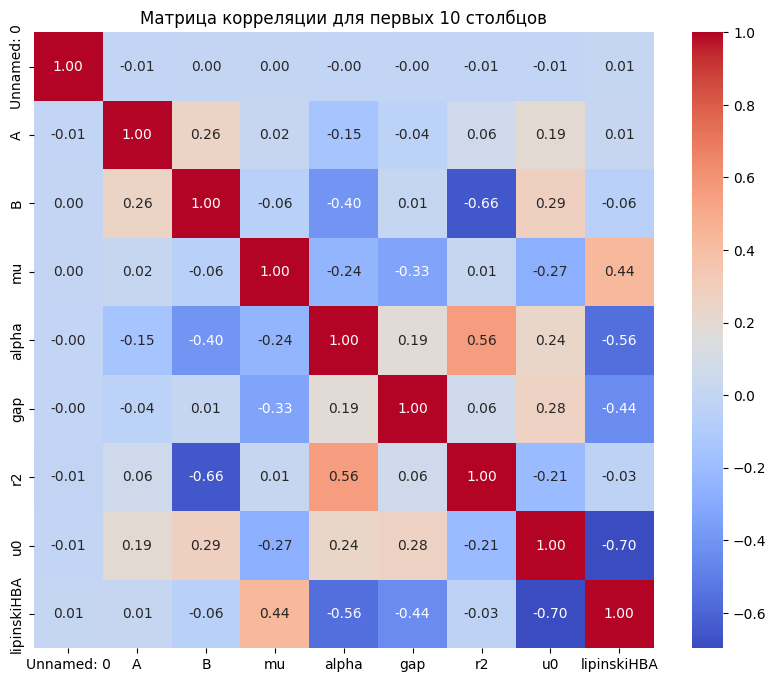

In [130]:
subset_df = df.iloc[:, :10] #Выбор первых 10 столбцов для анализа

correlation_matrix = subset_df.corr() #Создание матрицы корреляции

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции для первых 10 столбцов")
plt.show()

Корреляции стобцов были удалены ещё в прошлой домашней работе, но сказано визуализировать данные, поэтому была построенна матрица.

In [131]:
df.to_csv('index_data.csv')

In [132]:
df = pd.read_csv('index_data.csv')

3. Мы используем IQR для уборки выбросов и нормализация (будем делать MinMax нормализацию, так как )

In [133]:
#Построим график распределения целевой переменной
fig = make_subplots(rows=1, cols=2, subplot_titles=['Histogram for gap', 'Violin Plot for solubility'])

# Histogram
hist_fig = px.histogram(df, x="gap", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) # Adding a graph indicating the location

# Violin plot
violin_fig = px.violin(df, y="gap", color_discrete_sequence = colors, box = True)
fig.add_trace(violin_fig['data'][0], row=1, col=2) # Adding a graph indicating the location

# Setting up the layout
fig.update_layout(showlegend=False, title_text="Histogram и Violin Plot")

# Graph display
fig.show()

Как можно заметить распределение целевой переменной точно Гауссово, но есть незначительные выбросы, которые хорошо видны на обоих визуализациях

Хочу сравнить какие точки выбросов определит Z-score и IQR

In [134]:
#посмотрим какие именно точки целевой переменно являются выьросами с помощью Z-score
def detect_outliers_zscore(data, threshold=3.0):
    """
    Detect outliers using Z-score method.

    Parameters:
        data (array-like): Input data.
        threshold (float): Z-score threshold for identifying outliers.

    Returns:
        outliers (array-like): Array containing the indices of outlier data points.
    """
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return outliers

# Example usage:
outliers = detect_outliers_zscore(df['gap'])
print("Индексы выбросов:", outliers)
print("Значения выбросов:", [df['gap'][i] for i in outliers])

Индексы выбросов: [ 2085  3758  4531  4537  4960  5344  8176  8626  9443  9794 11467 12073
 13901 15061 15662 16893 17405]
Значения выбросов: [0.0966, 0.0805, 0.1027, 0.417, 0.074, 0.0789, 0.4063, 0.0623, 0.1028, 0.0376, 0.1061, 0.0841, 0.1046, 0.4802, 0.0821, 0.4107, 0.0814]


In [135]:
#Ещё посмотрим с помощью интерквартального расстояния, так будет понятней, значения за первым и 3 квартилям будут выбросами
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Parameters:
        data (array-like): Input data.
        threshold (float): Multiplier for the IQR to determine the outlier cutoff.

    Returns:
        outliers (array-like): Array containing the indices of outlier data points.
    """
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (threshold * iqr)
    upper_bound = quartile_3 + (threshold * iqr)
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

# Example usage:
outliers = detect_outliers_iqr(df['gap'])
print("Индексы выбросов:", outliers)
print("Значения выбросов:", [df['gap'][i] for i in outliers])

Индексы выбросов: [ 2085  3758  4531  4537  4960  5344  8176  8626  9443  9794 11467 12073
 13901 15061 15662 16893 17405]
Значения выбросов: [0.0966, 0.0805, 0.1027, 0.417, 0.074, 0.0789, 0.4063, 0.0623, 0.1028, 0.0376, 0.1061, 0.0841, 0.1046, 0.4802, 0.0821, 0.4107, 0.0814]


In [136]:
df

,Unnamed: 0.1,Unnamed: 0,smiles,A,B,mu,alpha,gap,r2,u0,...,n7aRing,n9aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,TopoShapeIndex
0,0,0,O=CC1CCC2OC2C1,3.61423,1.09149,2.0905,75.54,0.2258,1253.8737,-423.035656,...,0,0,0,0,1,0,0,0.276111,0.142500,0.666667
1,1,1,COC12CC=C3CC1C23,3.33497,1.50547,1.5224,82.20,0.1826,1047.6956,-385.774234,...,0,0,0,0,1,0,0,0.250000,0.000000,1.000000
2,2,2,OC1CCC(=O)C1,5.59112,1.96604,2.2377,56.85,0.2209,771.3820,-345.686487,...,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
3,3,3,N#CC12NC3CNC1C23,4.19762,1.34307,5.2940,74.13,0.2368,1017.8124,-396.880645,...,0,0,0,0,1,0,0,0.262222,0.062500,0.666667
4,4,4,CC(=NO)CC(C)(C)C,2.79330,0.93080,0.5406,88.74,0.2507,1518.5343,-405.527293,...,0,0,0,0,0,0,0,0.240000,0.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,19995,19995,C1OC23CCN=C2NC13,3.34284,1.73396,3.1256,73.93,0.2382,958.9895,-417.956479,...,0,0,0,0,0,0,0,0.097222,0.000000,1.000000
19994,19996,19996,CC(C#C)C1=CON=C1,3.29901,1.16566,2.9980,75.07,0.2459,1236.5085,-400.708122,...,0,0,0,0,0,0,0,0.250000,0.080000,0.666667
19995,19997,19997,CC(C)(C)C(C#N)C#N,1.79871,1.63214,4.5091,79.46,0.3225,1197.0545,-382.105873,...,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
19996,19998,19998,COC(=O)C1CC(=O)N1,4.65384,0.89755,4.4515,66.65,0.2512,1364.6319,-475.072597,...,0,0,0,0,0,0,0,0.422222,0.118056,1.000000


Количество выбросов и их значения получились одинаковые. Так как у нас нормальное распрделение целевой переменной, то логичней было бы использовать Z-scor с самого начала, но так как при постановке задачи, то я написала сначала про IQR. Но для наших данных не имело значения, который из этих методов использовать

Визуализация выбросов

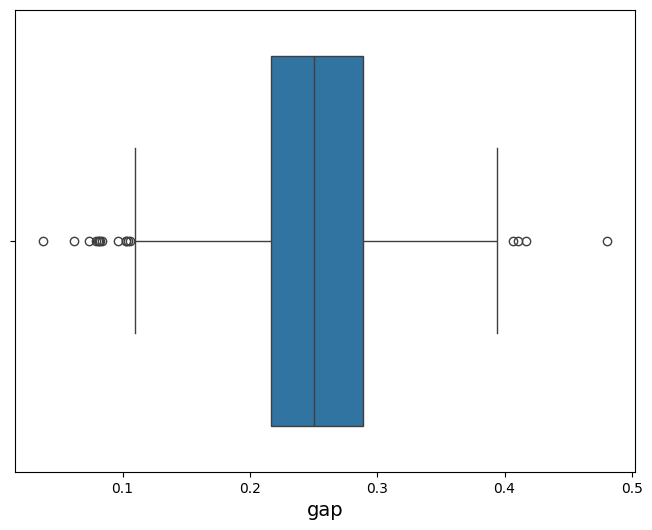

In [137]:
# Создание ящика с усами для столбца 'gap'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gap'])

# Добавление названия оси x
plt.xlabel('gap', fontsize=14)

# Отображение графика
plt.show()

In [138]:
# Detect outliers
outliers = detect_outliers_iqr(df['gap'])

# Получение значений выбросов
outlier_values = df.loc[outliers, 'gap']

# Scatter plot
fig = go.Figure()

# Plot all data points
fig.add_trace(go.Scatter(x=np.arange(len(df['gap'])), y=df['gap'], mode='markers', name='Data Points', marker=dict(color=colors[2])))

# Highlight outliers
fig.add_trace(go.Scatter(x=outliers, y=outlier_values, mode='markers', marker=dict(color=colors[0]), name='Outliers'))

# Add layout
fig.update_layout(title='Outlier Detection Using IQR Method',
                  xaxis_title='Index',
                  yaxis_title='Value')

# Show plot
fig.show()

In [139]:
out_data = df.drop(outliers)
out_data.head()

,Unnamed: 0.1,Unnamed: 0,smiles,A,B,mu,alpha,gap,r2,u0,...,n7aRing,n9aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,TopoShapeIndex
0,0,0,O=CC1CCC2OC2C1,3.61423,1.09149,2.0905,75.54,0.2258,1253.8737,-423.035656,...,0,0,0,0,1,0,0,0.276111,0.1425,0.666667
1,1,1,COC12CC=C3CC1C23,3.33497,1.50547,1.5224,82.20,0.1826,1047.6956,-385.774234,...,0,0,0,0,1,0,0,0.250000,0.0000,1.000000
2,2,2,OC1CCC(=O)C1,5.59112,1.96604,2.2377,56.85,0.2209,771.3820,-345.686487,...,0,0,0,0,0,0,0,0.000000,0.0000,1.000000
3,3,3,N#CC12NC3CNC1C23,4.19762,1.34307,5.2940,74.13,0.2368,1017.8124,-396.880645,...,0,0,0,0,1,0,0,0.262222,0.0625,0.666667
4,4,4,CC(=NO)CC(C)(C)C,2.79330,0.93080,0.5406,88.74,0.2507,1518.5343,-405.527293,...,0,0,0,0,0,0,0,0.240000,0.0000,0.666667


Удалили 6 строк выбросов, так как у нас было 18897, а после удаления 19981

In [140]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19981 entries, 0 to 19997
Columns: 146 entries, Unnamed: 0.1 to TopoShapeIndex
dtypes: float64(98), int64(47), object(1)
memory usage: 22.4+ MB


In [141]:
df = out_data

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19981 entries, 0 to 19997
Columns: 146 entries, Unnamed: 0.1 to TopoShapeIndex
dtypes: float64(98), int64(47), object(1)
memory usage: 22.4+ MB


Проведём нормализацию

Эти две колонки не нуждаются в нормализации, так как одна - целевая пермееная, а другая просто индентификатор

In [143]:
gap =  df['gap']
smiles =  df['smiles']
df = df.drop(columns = ['gap', 'smiles', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [145]:
# Min-Max normalization
scaler = MinMaxScaler()
df_enc_minmax = scaler.fit_transform(df)

# Convert the scaled array into a DataFrame
df_enc_minmax = pd.DataFrame(df_enc_minmax, columns=df.columns)
df_enc_minmax['smiles'] = smiles
df_enc_minmax['gap'] = gap

print(df_enc_minmax)

              A         B        mu     alpha        r2        u0  \
0      0.012660  0.017045  0.132554  0.479163  0.362334  0.357601   
1      0.011682  0.026399  0.096532  0.530182  0.300345  0.430220   
2      0.019584  0.036806  0.141888  0.335989  0.217268  0.508346   
3      0.014703  0.022730  0.335682  0.468362  0.291360  0.408575   
4      0.009784  0.013414  0.034278  0.580282  0.441907  0.391723   
...         ...       ...       ...       ...       ...       ...   
19976  0.011709  0.031562  0.198188  0.466830  0.273674  0.367500   
19977  0.011556  0.018721  0.190097  0.475563  0.357113  0.401115   
19978  0.006300  0.029262  0.285913  0.509193  0.345251  0.437369   
19979  0.016301  0.012663  0.282260  0.411062  0.395635  0.256188   
19980  0.009867  0.019178  0.197135  0.496400  0.364178  0.398739   

       lipinskiHBA  lipinskiHBD  NumRotatableBonds  NumAmideBonds  ...  \
0         0.285714     0.000000           0.166667           0.00  ...   
1         0.142857     

In [147]:
df = df_enc_minmax

In [148]:
# количество частей, на которые вы хотите разбить файл
num_parts = 5

# Определите размер каждой части
total_rows = len(df)
chunk_size = total_rows // num_parts

# Разделите DataFrame на части и сохраните каждую часть в отдельный файл
for i in range(num_parts):
    start_idx = i * chunk_size
    end_idx = start_idx + chunk_size
    if i == num_parts - 1:  # для последней части включите оставшиеся строки
        end_idx = total_rows
    df_chunk = df.iloc[start_idx:end_idx]
    df_chunk.to_csv(f'data3_after_{i+1}.csv', encoding='utf-8', index=False)